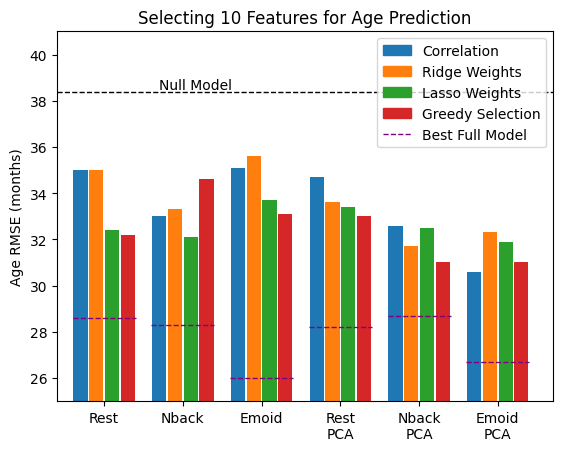

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

rest = np.array([35,35,32.4,32.2])
nback = np.array([33,33.3,32.1,34.6])
emoid = np.array([35.1,35.6,33.7,33.1])

restpca = np.array([34.7,33.6,33.4,33])
nbackpca = np.array([32.6,31.7,32.5,31])
emoidpca = np.array([30.6,32.3,31.9,31])

fullmodel = np.array([28.6,28.3,26,28.2,28.7,26.7])

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:4]
# colors = ['#35f','#57f','#79f','#9af']

for i,data in enumerate([rest, nback, emoid, restpca, nbackpca, emoidpca]):
    plt.bar(i+0.2*np.arange(len(data)), data, width=0.18, color=colors)
    if i == 0:
        im, = plt.plot([i-0.1,i+0.7],[fullmodel[i],fullmodel[i]], 
                       color='purple', linestyle='--', linewidth=1, label='Best Full Model')
    else:
        plt.plot([i-0.1,i+0.7],[fullmodel[i],fullmodel[i]], 
                       color='purple', linestyle='--', linewidth=1)
    
patches = []
for c,lab in zip(colors,['Correlation','Ridge Weights', 'Lasso Weights', 'Greedy Selection']):
    p = mpatches.Patch(color=c, label=lab)
    patches.append(p)

plt.plot([-0.3,6],[38.4,38.4],color='black',linestyle='--',linewidth=1)
plt.ylim([25,41])
plt.xlim([-0.3,6])
plt.legend(handles=patches+[im])
plt.title('Selecting 10 Features for Age Prediction')
plt.ylabel('Age RMSE (months)')
plt.text(1,38.5,'Null Model')
plt.xticks(np.arange(6)+0.3,labels=['Rest', 'Nback', 'Emoid', "Rest\nPCA", "Nback\nPCA", "Emoid\nPCA"])
# plt.show()
plt.savefig('../../Work/ImageNomer/FiguresSPIE/FigureAgePred.pdf')

In [28]:
import re

restpca = '''
1   4  17   8  16 116  38 199 547 123
1  37  12   5 199  11 123  66   4  30
143  16  17 123  12  37   4  30 199   1
1 4 17 16 0 38 8 44 5 25
'''

nbackpca = '''
[ 1 19  0 14 35 56  3 29  6 37]
[ 1 14  0  4 35 47 17 12 11  6]
[408  12 120  35   4  11  14   6   0   1]
[1, 19, 14, 0, 4, 35, 6, 11, 29, 37]
'''

emoidpca = '''
[ 1  4 10  0 26  8 60 20 32 11]
[ 1 32 10  0 80  8 35 16 19 11]
[41 38 75  8 19  0 10 32 11  1]
[1, 11, 32, 4, 8, 60, 20, 10, 3, 0]
'''

rest = '''
[12315 33138 12312 18750 33303 28172 28165 28278 28279 28166]
[16763 18108 28519 32438 24986  5808 27090 26967  4829 26966]
[28737 33816 16186 32440 12312  8353 24986 16763   400  8268]
[12315, 33138, 24986, 28166, 8268, 11359, 20703, 10616, 16763, 400]
'''

nback = '''
[24986 24847 33138 33903 33939   428  5594   400   401   432]
[24986 25319 24847 24846 33903 26978 14422 26993  5556   400]
[  732  5594  8359 24847  9520 33138  6080   400  2817 24986]
[24986, 24847, 33138, 24846, 2817, 1545, 5594, 769, 19806, 503]
'''

emoid = '''
[33939 33941 33903 13354 33138   446   444   432   443   400]
[ 4101 24847  7462 22162  4089  6026   400  5804   138 26967]
[14309 17517  8038  8043 11272 33975 15698 24986  8798   400]
[400, 33903, 28448, 16914, 34540, 30445, 19829, 6075, 20531, 28167]
'''

restpca = re.split('[\s\][,]+', rest + nback + emoid)
restpca = list(filter(None, restpca))
keys = set()
counts = dict()

for k in restpca:
    keys.add(k)
    
for k in keys:
    counts[k] = 0
    
for k in restpca:
    counts[k] += 1
    
# print(counts)
counts = [[k,v] for k,v in counts.items()]
counts.sort(key=lambda a: a[1])
print(counts[::-1])

[['400', 9], ['24986', 8], ['33138', 6], ['24847', 5], ['33903', 4], ['5594', 3], ['16763', 3], ['8268', 2], ['28166', 2], ['26967', 2], ['12312', 2], ['12315', 2], ['24846', 2], ['2817', 2], ['432', 2], ['33939', 2], ['26993', 1], ['732', 1], ['9520', 1], ['30445', 1], ['6026', 1], ['446', 1], ['14309', 1], ['6080', 1], ['13354', 1], ['28172', 1], ['33941', 1], ['16186', 1], ['4089', 1], ['26978', 1], ['8038', 1], ['8798', 1], ['7462', 1], ['28165', 1], ['11272', 1], ['8353', 1], ['19806', 1], ['8359', 1], ['444', 1], ['1545', 1], ['401', 1], ['27090', 1], ['4829', 1], ['19829', 1], ['14422', 1], ['15698', 1], ['5804', 1], ['5556', 1], ['33303', 1], ['10616', 1], ['34540', 1], ['28448', 1], ['8043', 1], ['11359', 1], ['443', 1], ['16914', 1], ['28278', 1], ['4101', 1], ['18108', 1], ['25319', 1], ['28519', 1], ['28279', 1], ['32438', 1], ['6075', 1], ['22162', 1], ['26966', 1], ['5808', 1], ['17517', 1], ['32440', 1], ['20531', 1], ['28167', 1], ['20703', 1], ['503', 1], ['428', 1], [

In [2]:
import numpy as np

ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45, 
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132, 
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186, 
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257, 
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,  
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248, 
249, 252, 253]

def make_fn_map(bounds):
    fnidx = 0 
    bmap = dict()
    for i in range(264):
        if i >= bounds[fnidx]:
            fnidx += 1
        bmap[i] = fnidx
    return bmap

bounds = [30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]
fn_map = make_fn_map(bounds)

fn_names = 'SMT,SMH,CNG,AUD,DMN,MEM,VIS,FRNT,SAL,SUB,VATN,DATN,CB,UNK'.split(',')
fn_names_map = {idx: fn_names[fn] for idx,fn in fn_map.items()}

rois_a, rois_b = np.triu_indices(264,1)

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

def label(idcs, labtype='raw'):
    if labtype == 'raw':
        return [str(idx) for idx in idcs]
    if labtype == 'rois':
        return [f'{rois_a[idx]}-{rois_b[idx]}' for idx in idcs]
    if labtype == 'fns':
        fns = []

def vec2mat(vec):
    a,b = np.triu_indices(264,1)
    mat = np.zeros((264,264))
    mat[a,b] = vec
    mat[b,a] = vec
    return mat

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[a,b]

a,b = np.triu_indices(264,1)
# print(a[400],b[400])
# for idx in [400, 24986, 33138, 24847, 33903]:
for idx in [10433]:
    print(ours2orig.index(a[idx]),ours2orig.index(b[idx]))

32 60


/tmp/ipykernel_69602/795921579.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


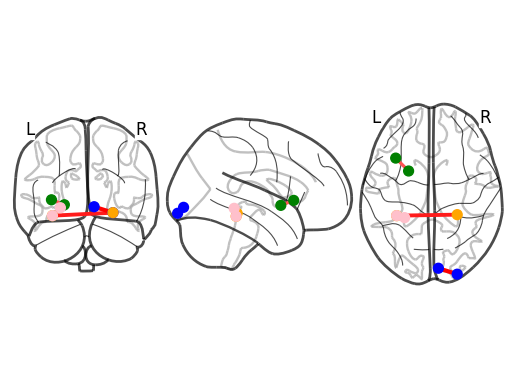

In [41]:
'''UNK-UNK, DMN-DMN, SAL-SUB'''

'''
237 251
111 112
186 204
'''

'''race nback? 10433 32 60 remapped 0-index'''

import matplotlib.pyplot as plt
import nilearn.plotting as niplt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(1,1)

# Remapped to original ROIs
# Numbers are 1 less than in XLS file (0-indexing)

A = np.zeros((8,8))
A[0,1] = 9
A[2,3] = 8
A[4,5] = 6
A[6,7] = 5
A = A+A.T

r237 = (27,-97,-13)
r251 = (8,-91,-7)
r110 = (-26,-40,-8)
r111 = (27,-37,-13)
r112 = (-34,-38,-16)
r186 = (-35,20,0)
r204 = (-22,7,-5)

niplt.plot_connectome(A,[r237,r251,r111,r112,r186,r204,r110,r112],2*['blue']+2*['orange']+2*['green']+2*['pink'],axes=ax)
ax.set_title("")

fig.show()
fig.savefig('../../Work/ImageNomer/FiguresSPIE/nback-nilearn.pdf')